# Análisis exploratorio de datos (EDA)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.cluster import KMeans
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.frequent_patterns import fpgrowth, association_rules

In [ ]:
df = pd.read_csv('retail_data.csv')

In [ ]:
print(df.head(10))

   Transaction_ID  Customer_ID                 Name                Email  \
0       8691788.0      37249.0  Michelle Harrington    Ebony39@gmail.com   
1       2174773.0      69749.0          Kelsey Hill     Mark36@gmail.com   
2       6679610.0      30192.0         Scott Jensen    Shane85@gmail.com   
3       7232460.0      62101.0        Joseph Miller     Mary34@gmail.com   
4       4983775.0      27901.0        Debra Coleman  Charles30@gmail.com   
5       6095326.0      41289.0         Ryan Johnson    Haley12@gmail.com   
6       5434096.0      97285.0           Erin Lewis   Arthur76@gmail.com   
7       2344675.0      26603.0        Angela Fields    Tanya94@gmail.com   
8       4155845.0      80175.0          Diane Clark   Martin39@gmail.com   
9       4926148.0      31878.0            Lori Bell  Jessica33@gmail.com   

          Phone                       Address        City            State  \
0  1.414787e+09             3959 Amanda Burgs    Dortmund           Berlin   
1  6.85

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    301677 non-null  float64
 1   Customer_ID       301702 non-null  float64
 2   Name              301628 non-null  object 
 3   Email             301663 non-null  object 
 4   Phone             301648 non-null  float64
 5   Address           301695 non-null  object 
 6   City              301762 non-null  object 
 7   State             301729 non-null  object 
 8   Zipcode           301670 non-null  float64
 9   Country           301739 non-null  object 
 10  Age               301837 non-null  float64
 11  Gender            301693 non-null  object 
 12  Income            301720 non-null  object 
 13  Customer_Segment  301795 non-null  object 
 14  Date              301651 non-null  object 
 15  Year              301660 non-null  float64
 16  Month             30

In [ ]:
print(df.describe())

       Transaction_ID    Customer_ID         Phone        Zipcode  \
count    3.016770e+05  301702.000000  3.016480e+05  301670.000000   
mean     5.495823e+06   55006.553934  5.501464e+09   50298.951019   
std      2.595565e+06   26005.675200  2.596017e+09   28972.807134   
min      1.000007e+06   10000.000000  1.000049e+09     501.000000   
25%      3.247930e+06   32469.250000  3.255061e+09   25425.000000   
50%      5.499657e+06   55012.000000  5.505812e+09   50602.500000   
75%      7.739509e+06   77511.000000  7.749860e+09   75252.000000   
max      9.999995e+06   99999.000000  9.999996e+09   99949.000000   

                 Age           Year  Total_Purchases         Amount  \
count  301837.000000  301660.000000    301649.000000  301653.000000   
mean       35.481326    2023.165113         5.359729     255.163659   
std        15.021933       0.371283         2.868575     141.389640   
min        18.000000    2023.000000         1.000000      10.000219   
25%        22.000000   

In [ ]:
print(df.columns.tolist())

['Transaction_ID', 'Customer_ID', 'Name', 'Email', 'Phone', 'Address', 'City', 'State', 'Zipcode', 'Country', 'Age', 'Gender', 'Income', 'Customer_Segment', 'Date', 'Year', 'Month', 'Time', 'Total_Purchases', 'Amount', 'Total_Amount', 'Product_Category', 'Product_Brand', 'Product_Type', 'Feedback', 'Shipping_Method', 'Payment_Method', 'Order_Status', 'Ratings', 'products']


In [ ]:
numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(numericas)

['Transaction_ID', 'Customer_ID', 'Phone', 'Zipcode', 'Age', 'Year', 'Total_Purchases', 'Amount', 'Total_Amount', 'Ratings']


In [ ]:
categoricas = df.select_dtypes(include=['object']).columns.tolist()
print(categoricas)

['Name', 'Email', 'Address', 'City', 'State', 'Country', 'Gender', 'Income', 'Customer_Segment', 'Date', 'Month', 'Time', 'Product_Category', 'Product_Brand', 'Product_Type', 'Feedback', 'Shipping_Method', 'Payment_Method', 'Order_Status', 'products']


In [ ]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} valores únicos")

Transaction_ID: 294461 valores únicos
Customer_ID: 86766 valores únicos
Name: 159390 valores únicos
Email: 52897 valores únicos
Phone: 299295 valores únicos
Address: 299329 valores únicos
City: 130 valores únicos
State: 54 valores únicos
Zipcode: 93978 valores únicos
Country: 5 valores únicos
Age: 53 valores únicos
Gender: 2 valores únicos
Income: 3 valores únicos
Customer_Segment: 3 valores únicos
Date: 366 valores únicos
Year: 2 valores únicos
Month: 12 valores únicos
Time: 83677 valores únicos
Total_Purchases: 10 valores únicos
Amount: 299297 valores únicos
Total_Amount: 299305 valores únicos
Product_Category: 5 valores únicos
Product_Brand: 18 valores únicos
Product_Type: 33 valores únicos
Feedback: 4 valores únicos
Shipping_Method: 3 valores únicos
Payment_Method: 4 valores únicos
Order_Status: 4 valores únicos
Ratings: 5 valores únicos
products: 318 valores únicos


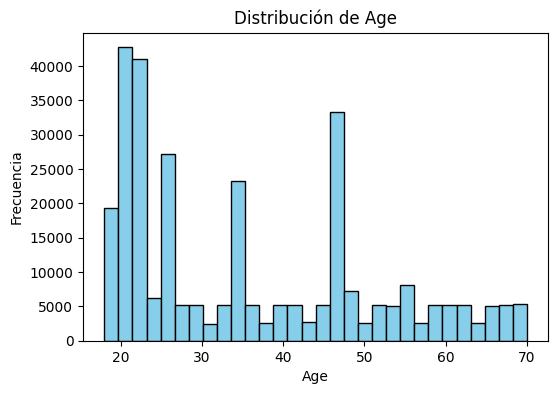

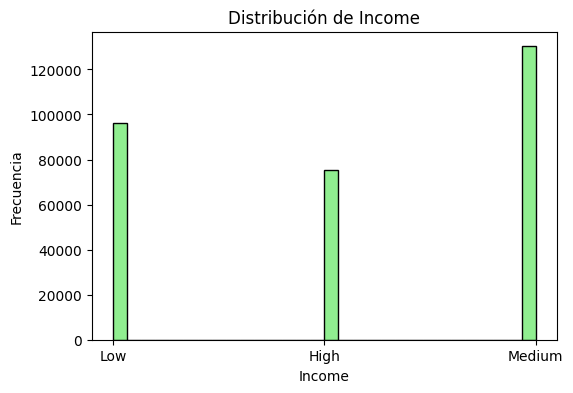

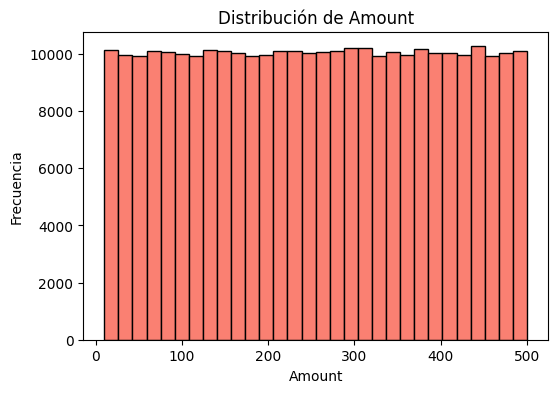

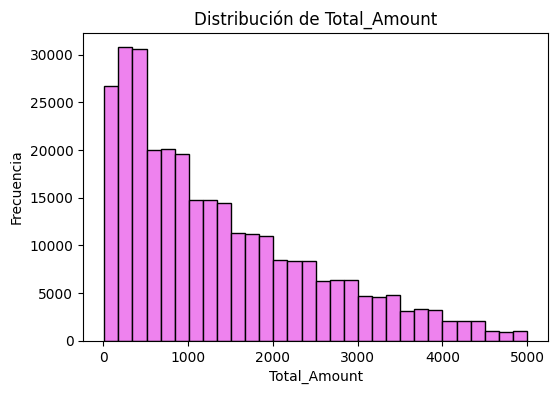

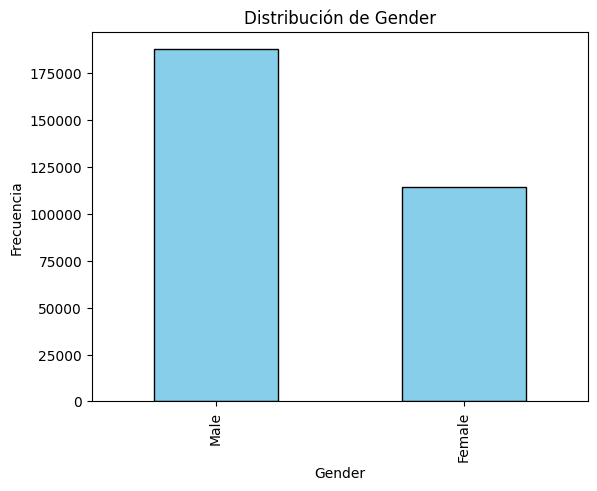

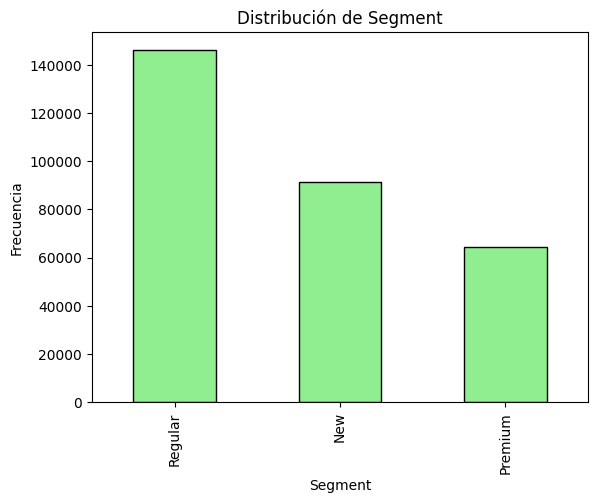

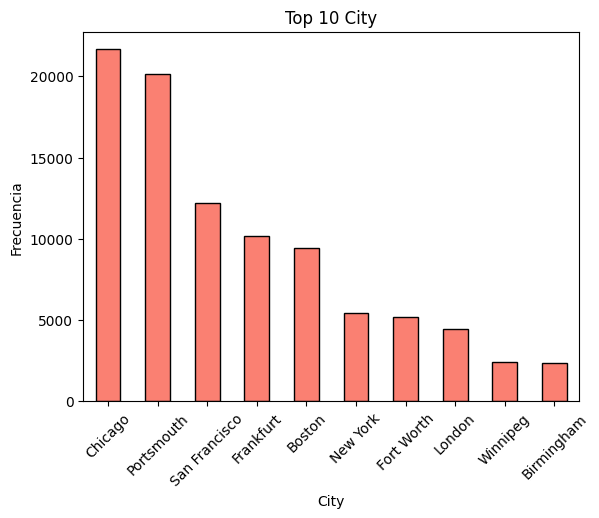

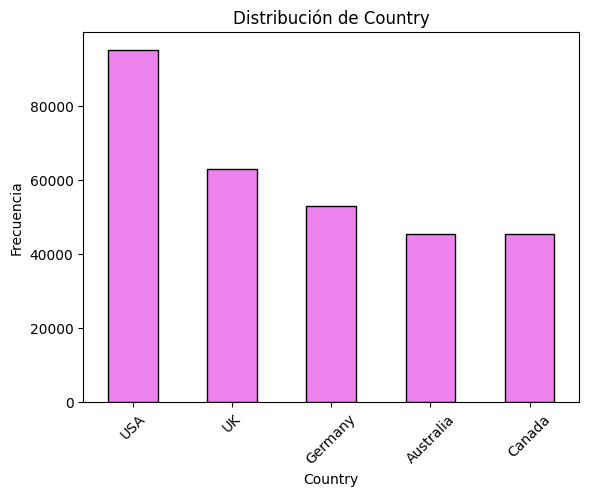

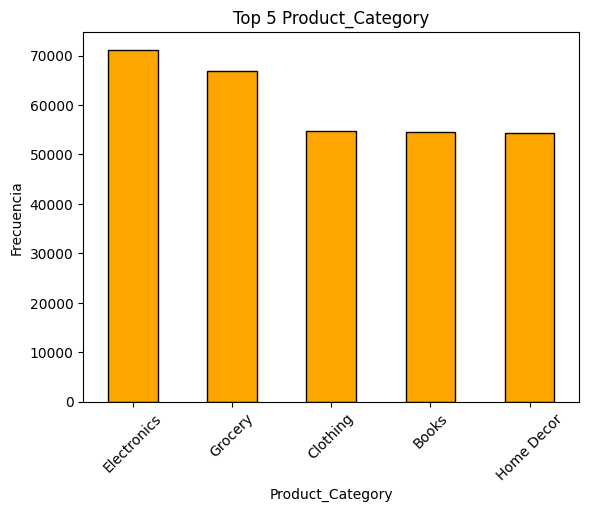

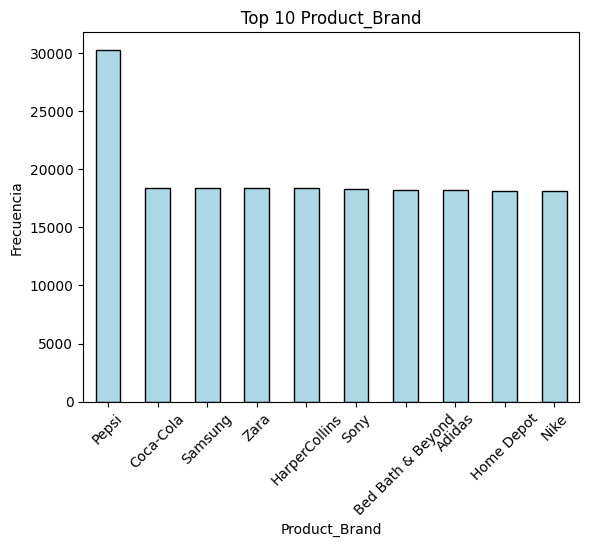

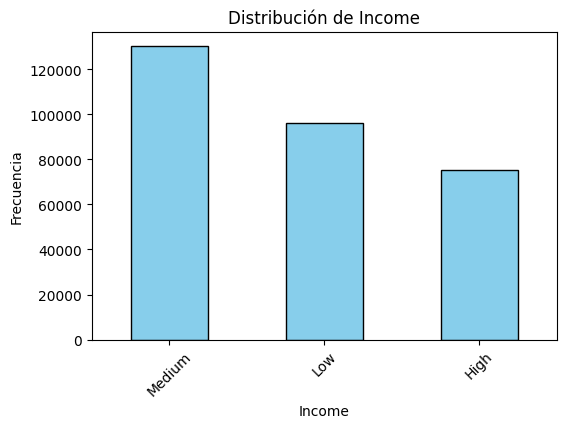

In [ ]:
# Representación mediate distribuciones de las variables más relevantes para el análisis

plt.figure(figsize=(6,4))
plt.hist(df['Age'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de Age')
plt.xlabel('Age')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(6,4))
plt.hist(df['Income'].dropna(), bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribución de Income')
plt.xlabel('Income')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(6,4))
plt.hist(df['Amount'].dropna(), bins=30, color='salmon', edgecolor='black')
plt.title('Distribución de Amount')
plt.xlabel('Amount')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(6,4))
plt.hist(df['Total_Amount'].dropna(), bins=30, color='violet', edgecolor='black')
plt.title('Distribución de Total_Amount')
plt.xlabel('Total_Amount')
plt.ylabel('Frecuencia')
plt.show()

df['Gender'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribución de Gender')
plt.xlabel('Gender')
plt.ylabel('Frecuencia')
plt.show()

df['Customer_Segment'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Distribución de Segment')
plt.xlabel('Segment')
plt.ylabel('Frecuencia')
plt.show()

df['City'].value_counts().head(10).plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Top 10 City')
plt.xlabel('City')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

df['Country'].value_counts().plot(kind='bar', color='violet', edgecolor='black')
plt.title('Distribución de Country')
plt.xlabel('Country')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

df['Product_Category'].value_counts().head(10).plot(kind='bar', color='orange', edgecolor='black')
plt.title('Top 5 Product_Category')
plt.xlabel('Product_Category')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

df['Product_Brand'].value_counts().head(10).plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Top 10 Product_Brand')
plt.xlabel('Product_Brand')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

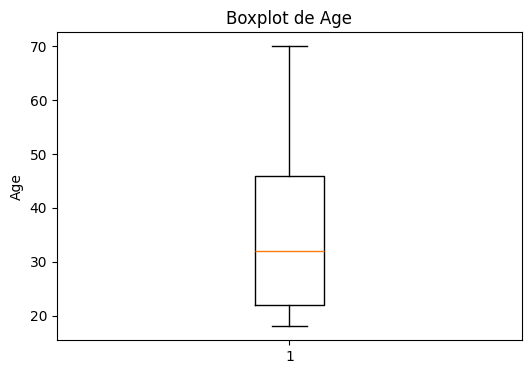

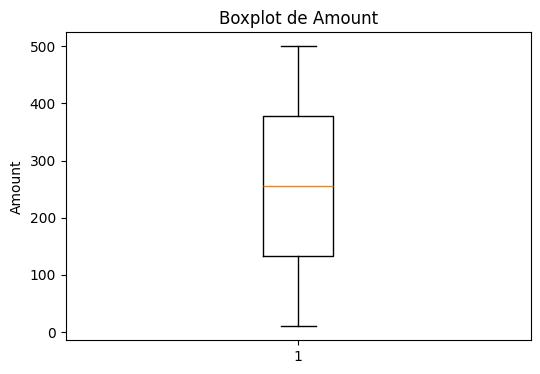

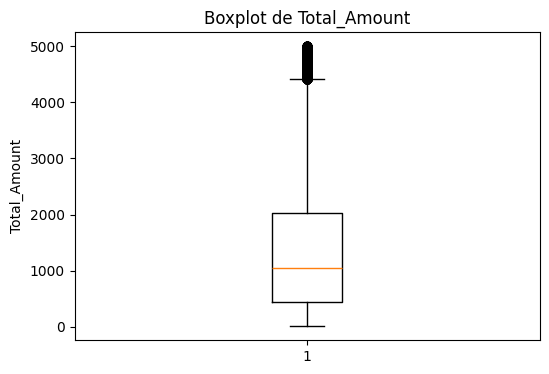


Análisis de outliers para Age:
  Límite inferior: -14.0
  Límite superior: 82.0
  Outliers detectados: 0 registros (0.00%)

Análisis de outliers para Amount:
  Límite inferior: -234.2819987499999
  Límite superior: 744.8453688499999
  Outliers detectados: 0 registros (0.00%)

Análisis de outliers para Total_Amount:
  Límite inferior: -1948.1890836874995
  Límite superior: 4416.9132154125
  Outliers detectados: 3897 registros (1.29%)


In [ ]:
columnas_numericas = ['Amount', 'Total_Amount']

# Convertir las columnas numéricas al tipo float
for col in columnas_numericas:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Boxplots para visualizar posibles outliers
for col in columnas_numericas:
    plt.figure(figsize=(6, 4))
    plt.boxplot(df[col].dropna())
    plt.title(f'Boxplot de {col}')
    plt.ylabel(col)
    plt.show()

# Análisis de outliers por IQR
for col in columnas_numericas:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = df[(df[col] < limite_inferior) | (df[col] > limite_superior)]
    porcentaje_outliers = len(outliers) / len(df) * 100

    print(f"\nAnálisis de outliers para {col}:")
    print(f"  Límite inferior: {limite_inferior}")
    print(f"  Límite superior: {limite_superior}")
    print(f"  Outliers detectados: {len(outliers)} registros ({porcentaje_outliers:.2f}%)")


# Análisis RFM (Recency, Frequency y Monetary)



### Paso 1: Preparación de los datos para en análisi RFM

Para ello es necesario asegurarnos de que la variable "Date" sea reconocida como fecha. Los resultados muestran que el dataset cubre el periodo desde el 13 de marzo de 2023 hasta el 29 de febrero de 2024. Se ha tomado como fecha de referencia el día siguiente (1 de marzo de 2024) para calcular la recencia

In [ ]:
# Convertir la columna 'Date' a formato fecha
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Eliminar las filas vacías de 'Customer_ID' y 'Date'
df_rfm = df.dropna(subset=['Customer_ID', 'Date'])

# Comprobar el rango de fechas disponible
print("Rango de fechas del dataset:")
print(f"Desde: {df_rfm['Date'].min()} hasta: {df_rfm['Date'].max()}")

# Definir la fecha de referencia para calcular la recencia
fecha_referencia = df_rfm['Date'].max() + pd.Timedelta(days=1)
print(f"Fecha de referencia para Recency: {fecha_referencia}")


Rango de fechas del dataset:
Desde: 2023-03-13 00:00:00 hasta: 2024-02-29 00:00:00
Fecha de referencia para Recency: 2024-03-01 00:00:00


### Paso 2: Cálculo de métricas RFM


In [ ]:
# Agrupar por Customer_ID para calcular R, F y M

rfm = df_rfm.groupby('Customer_ID').agg({
    'Date': lambda x: (fecha_referencia - x.max()).days,   # Recency: días desde última compra
    'Transaction_ID': 'nunique',                           # Frequency: número de compras únicas
    'Total_Amount': 'sum'                                  # Monetary: gasto total acumulado
}).reset_index()

# Cambiar el nombre de las columnas
rfm.rename(columns={
    'Date': 'Recency',
    'Transaction_ID': 'Frequency',
    'Total_Amount': 'Monetary'
}, inplace=True)

print(rfm.describe())


        Customer_ID       Recency     Frequency      Monetary
count  77852.000000  77852.000000  77852.000000  77852.000000
mean   54965.922494    120.076106      2.326055   3205.140101
std    25967.168918     95.758460      1.270958   2468.694019
min    10000.000000      1.000000      0.000000      0.000000
25%    32495.500000     39.000000      1.000000   1285.227539
50%    54944.500000     99.000000      2.000000   2694.555648
75%    77412.500000    188.000000      3.000000   4545.068136
max    99999.000000    354.000000     10.000000  21931.911727


### Paso 3: Segmentación RFM

Se le asigna un score del 1-4 a cada componente del RFM, por lo tanto cada cliente obtiene un score total de 3 a 12. Cuanto más alto el score, mejor es el cliente (más reciente, más frecuente y más gasto).

In [ ]:
# Recency: cuanto menor, mejor (por eso el - en qcut inverso)
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4,3,2,1]).astype(int)

# Frequency y Monetary: cuanto mayor, mejor
rfm['F_Score'] = pd.qcut(rfm['Frequency'], 4, labels=[1,2,3,4]).astype(int)
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1,2,3,4]).astype(int)

# Se crea una columna RFM total sumando los tres scores
rfm['RFM_Score'] = rfm['R_Score'] + rfm['F_Score'] + rfm['M_Score']

print("\nDistribución del RFM_Score:")
print(rfm['RFM_Score'].value_counts().sort_index())



Distribución del RFM_Score:
RFM_Score
3     6547
4     7608
5     8878
6     9474
7     9711
8     9058
9     8346
10    7581
11    6364
12    4285
Name: count, dtype: int64


### Paso 4: Crear los segmentos



In [ ]:
def segmentacion(rfm_score):
    if rfm_score >= 10:
        return 'Premium'
    elif rfm_score >= 7:
        return 'Recurrentes'
    elif rfm_score >= 4:
        return 'Ocasionales'
    else:
        return 'Inactivos'

# Se aplica la función al dataframe
rfm['Segmento'] = rfm['RFM_Score'].apply(segmentacion)

print("\nDistribución de clientes por segmento:")
print(rfm['Segmento'].value_counts())



Distribución de clientes por segmento:
Segmento
Recurrentes    27115
Ocasionales    25960
Premium        18230
Inactivos       6547
Name: count, dtype: int64


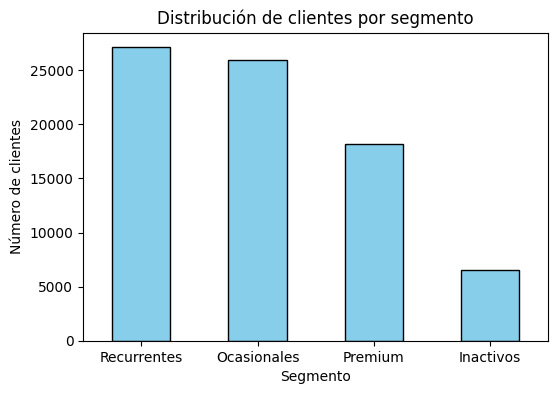

In [ ]:
# Gráfico de barras de la distribución de segmentos
segment_counts = rfm['Segmento'].value_counts()

plt.figure(figsize=(6,4))
segment_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribución de clientes por segmento')
plt.xlabel('Segmento')
plt.ylabel('Número de clientes')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Se agrupa por segmento para calcular las métricas medias de cada grupo
descriptivo = rfm.groupby('Segmento').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'Customer_ID': 'count'
}).rename(columns={'Customer_ID': 'Num_Clientes'})

# Redondeo
descriptivo = descriptivo.round(2)

# Nuevo orden
orden_segmentos = ['Premium', 'Recurrentes', 'Ocasionales', 'Inactivos']
descriptivo = descriptivo.loc[orden_segmentos]

print(descriptivo)

             Recency  Frequency  Monetary  Num_Clientes
Segmento                                               
Premium        43.69       3.96   6133.46         18230
Recurrentes    90.73       2.41   3373.94         27115
Ocasionales   165.78       1.42   1638.75         25960
Inactivos     273.11       1.00    563.18          6547


# Clustering



Para realizar el clustering, se va a usar el mismo dataframe que se ha usado para el RFM. Es decir, se va a hacer clustering sobre las variables RFM (Recency, Frequency, Monetary).

In [ ]:
# Seleccionamos solo las columnas R, F, M para el clustering
rfm_clustering = rfm[['Recency', 'Frequency', 'Monetary']]

# Aplicamos escalado estándar (media 0, desviación estándar 1)
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_clustering)

print("Datos escalados:")
print(rfm_scaled[:5])

Datos escalados:
[[-0.17832592  1.31708198  0.73011796]
 [-0.1574399   1.31708198  0.42604915]
 [-0.26186999  1.31708198  0.21955103]
 [ 1.12705016 -1.04335694 -0.53243239]
 [-0.93022254 -1.04335694 -0.674054  ]]


In [ ]:
# Ajustamos PCA con el número de componentes igual al número de variables originales (3)
pca = PCA(n_components=3)
X_pca = pca.fit_transform(rfm_scaled)
X_pca.shape

(77852, 3)

In [ ]:
# Escalado de datos
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# Ajustamos PCA con el número total de variables
pca = PCA()
pca_components = pca.fit_transform(rfm_scaled)

# Creamos nombres para cada componente principal
PCAnames = ['PC' + str(i+1) for i in range(pca.n_components_)]

# Creamos DataFrame con la varianza explicada
exp_variance = pd.DataFrame(
    data=pca.explained_variance_ratio_,
    index=PCAnames,
    columns=['Exp_variance']
)

# Calculamos la varianza explicada acumulada
exp_variance['Cum_Exp_variance'] = exp_variance['Exp_variance'].cumsum()

exp_variance

,Exp_variance,Cum_Exp_variance
PC1,0.655678,0.655678
PC2,0.250709,0.906387
PC3,0.093613,1.000000


In [ ]:
# Definimos los nombres de las variables originales
numeric_features = ['Recency', 'Frequency', 'Monetary']

# Creamos el DataFrame con los loadings del PCA
loadings = pd.DataFrame(pca.components_.T, columns=PCAnames, index=numeric_features)

loadings

,PC1,PC2,PC3
Recency,-0.462532,0.872077,0.159830
Frequency,0.643882,0.206476,0.736739
Monetary,0.609492,0.443677,-0.657016


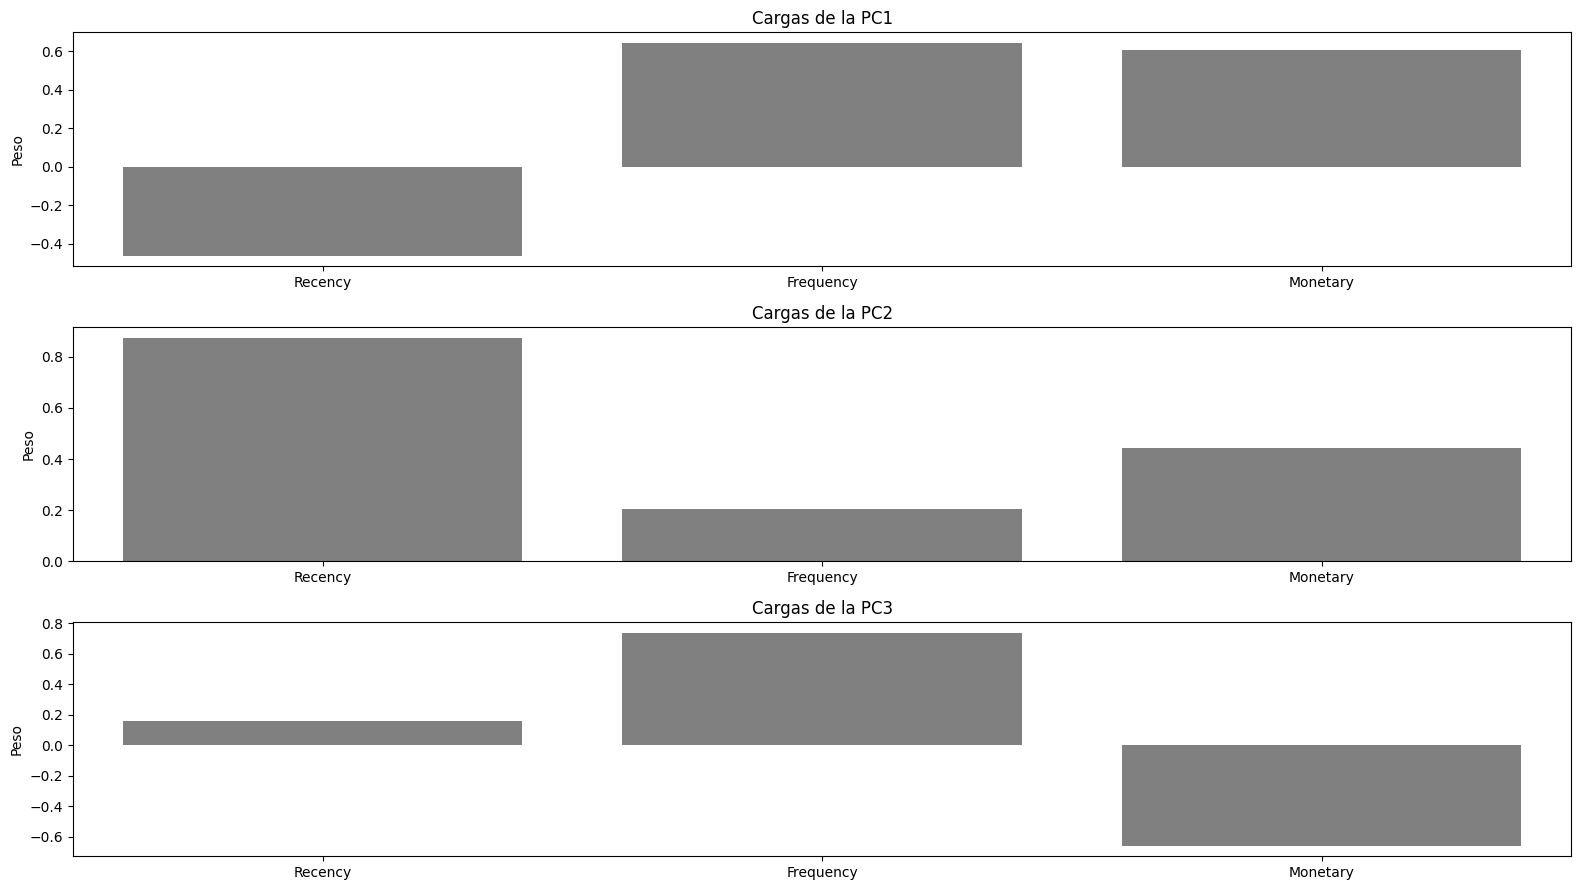

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(16, 9))
PC = 0

# Gráfico de barras para cada componente
for ax in axes.ravel():
    sns.barplot(data=loadings,
                x=loadings.index,
                y=loadings.columns[PC],
                color='gray',
                ax=ax)
    ax.set_title(f'Cargas de la {loadings.columns[PC]}')
    ax.set_ylabel('Peso')
    ax.set_xlabel('')
    PC += 1

plt.tight_layout()
plt.show()

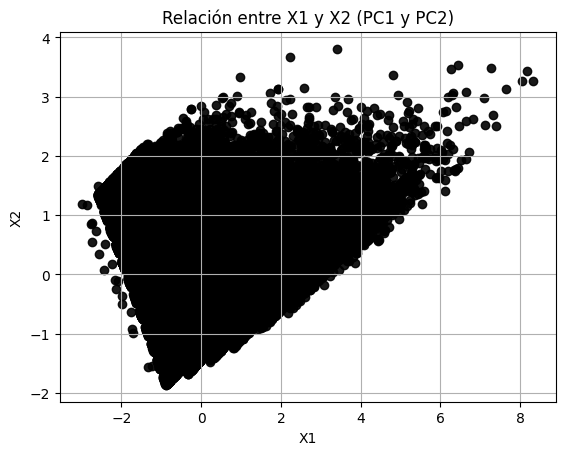

In [ ]:
# Creamos un DataFrame solo con las dos primeras componentes principales
df_pca = pd.DataFrame(X_pca[:, :2], columns=['X1', 'X2'])

# Gráfico de dispersión entre las dos primeras componentes
plt.figure()
plt.scatter(df_pca.X1, df_pca.X2, c='black', edgecolor='black', alpha=0.9)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Relación entre X1 y X2 (PC1 y PC2)")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Seleccionamos solo las variables numéricas relevantes
numeric_features = ['Recency', 'Frequency', 'Monetary']

# Aplicamos escalado estándar
scaler = StandardScaler()
X_transformed = scaler.fit_transform(rfm[numeric_features])

In [ ]:
# Aplicamos KMeans sobre las métricas RFM escaladas
kmeans_fit = KMeans(
    n_clusters=4,
    random_state=0,
    n_init=5
).fit(rfm_scaled)

# Etiquetas de cluster
kmeans_labels = kmeans_fit.labels_

# Añadimos los clusters al DataFrame RFM
rfm['Cluster_KMeans'] = kmeans_labels

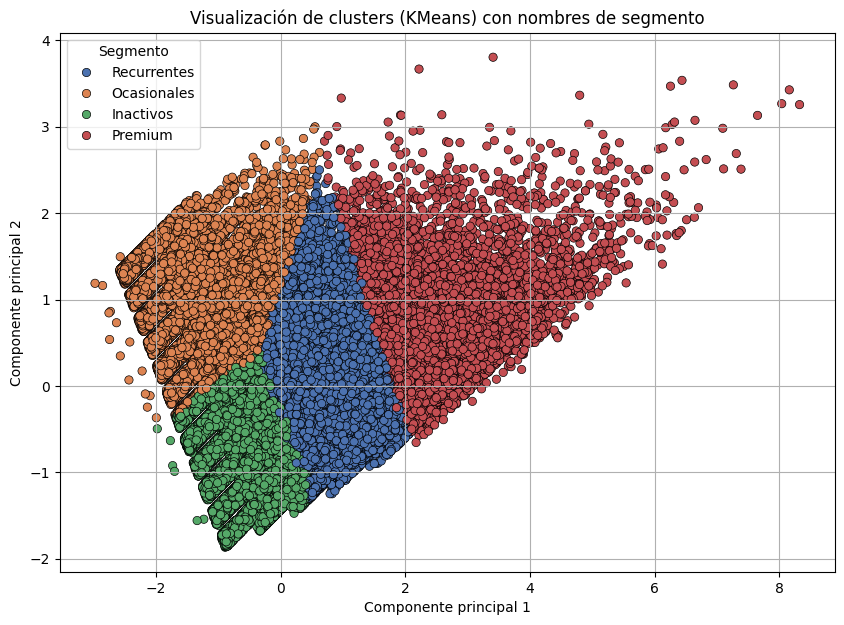

In [ ]:
# Creamos un DataFrame con las dos primeras componentes principales
df_pca = pd.DataFrame(X_pca[:, :2], columns=['X1', 'X2'])
df_pca['Cluster'] = kmeans_labels

# Asignamos nombres a cada cluster
def asignar_segmento(cluster):
    if cluster == 2:
        return 'Recurrentes'
    elif cluster == 0:
        return 'Premium'
    elif cluster == 1:
        return 'Inactivos'
    elif cluster == 3:
        return 'Ocasionales'

df_pca['Segmento'] = df_pca['Cluster'].apply(asignar_segmento)

plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_pca, x='X1', y='X2', hue='Segmento', palette='deep', edgecolor='black')
plt.title('Visualización de clusters (KMeans) con nombres de segmento')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.grid(True)
plt.show()

In [ ]:
# Silhouette score
silhouette_kmeans = silhouette_score(X_transformed, kmeans_labels)
print(silhouette_kmeans)

0.3223770168030744


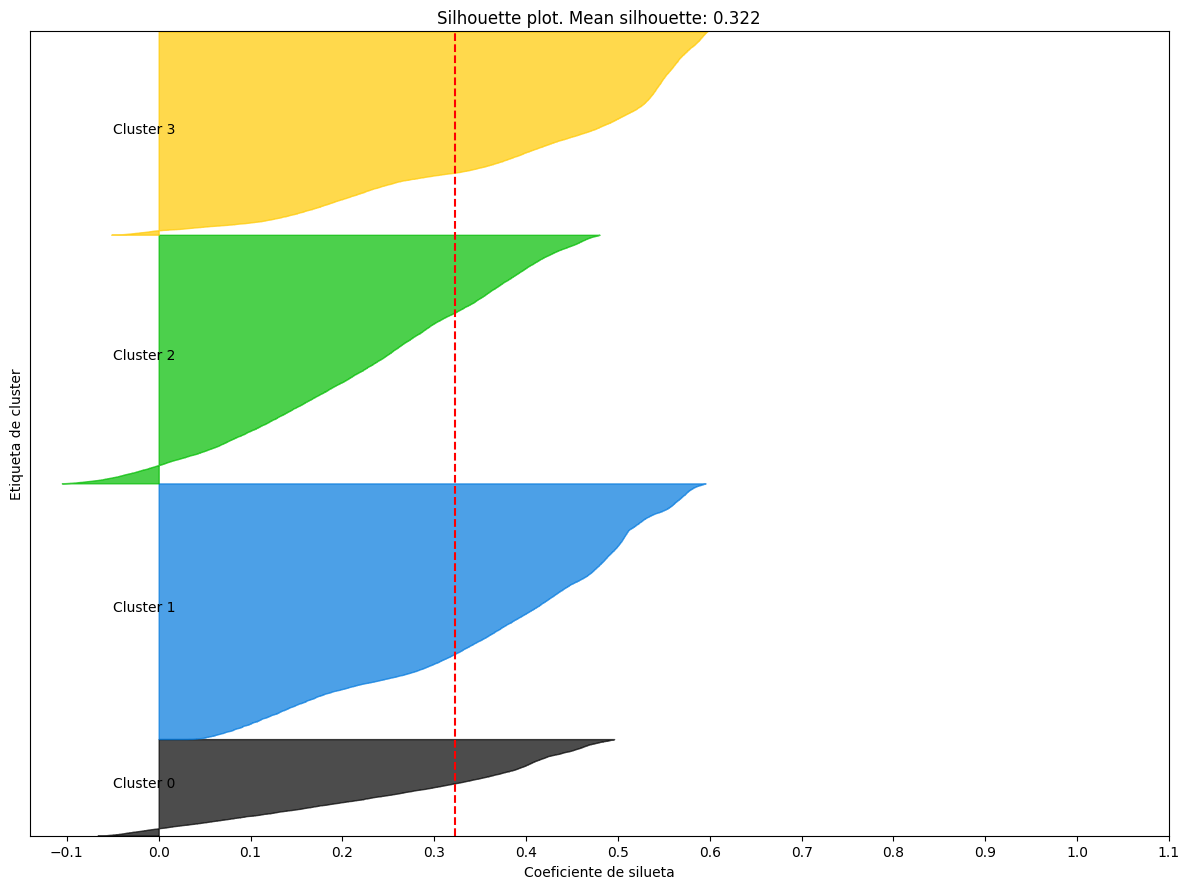

In [ ]:
def plot_silhouette(X, labels, figsize=(12, 9)):
    """
    Representa el gráfico de silueta para los clusters dados
    """
    fig, ax = plt.subplots(figsize=figsize)

    n_clusters = len(np.unique(labels))
    silhouette_vals = silhouette_samples(X, labels)

    ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    y_lower = 10

    for i in range(n_clusters):
        ith_cluster_vals = silhouette_vals[labels == i]
        ith_cluster_vals.sort()
        size_cluster_i = ith_cluster_vals.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_vals,
                         facecolor=color, edgecolor=color, alpha=0.7)
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, f'Cluster {i}')
        y_lower = y_upper + 10

    ax.set_title(f"Silhouette plot. Mean silhouette: {round(silhouette_vals.mean(), 3)}")
    ax.set_xlabel("Coeficiente de silueta")
    ax.set_ylabel("Etiqueta de cluster")
    ax.axvline(x=silhouette_vals.mean(), color="red", linestyle="--")
    ax.set_yticks([])
    ax.set_xticks(np.arange(-0.1, 1.1, 0.1))

    plt.tight_layout()
    plt.show()

plot_silhouette(X_transformed, kmeans_labels)

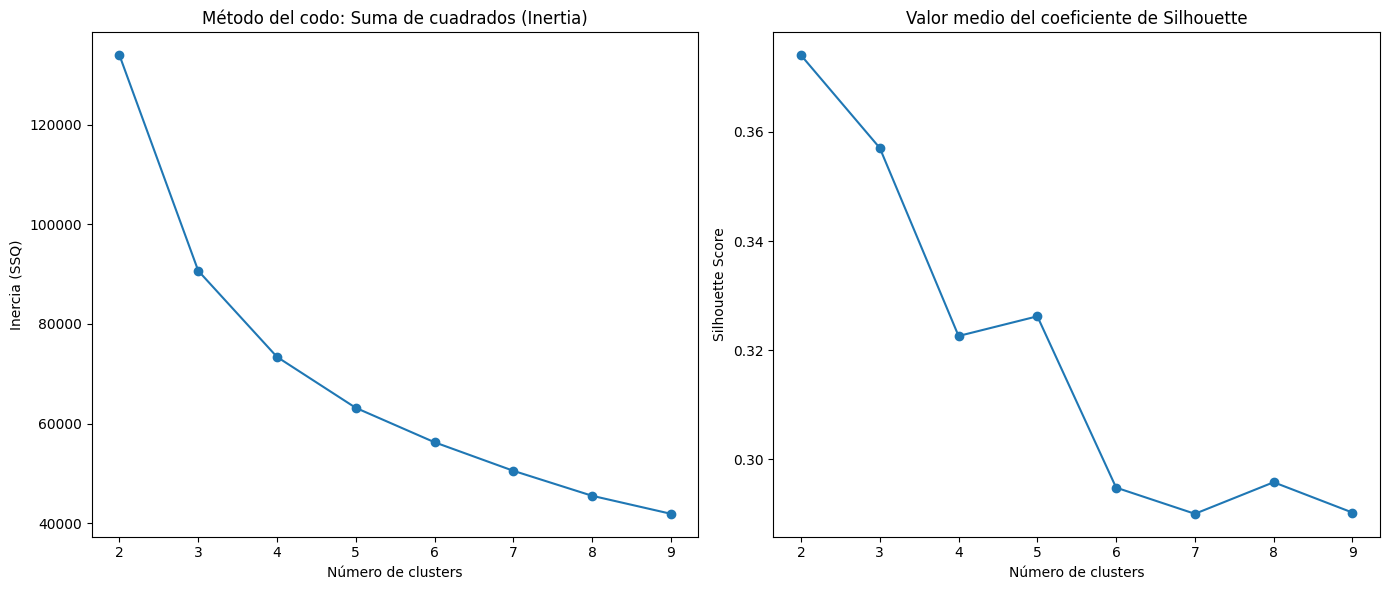

In [ ]:
# Evaluamos diferentes cantidades de clusters
range_n_clusters = list(range(2, 10))
SSQ = []       # Suma de distancias al cuadrado (inertia)
sil_avg = []   # Silhouette medio por número de clusters

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10, n_init=10)
    cluster_labels = clusterer.fit_predict(X_transformed)

    SSQ.append(clusterer.inertia_)
    sil_avg.append(silhouette_score(X_transformed, cluster_labels))

# Representamos los resultados
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico del método del codo
ax1.plot(range_n_clusters, SSQ, marker='o')
ax1.set_title("Método del codo: Suma de cuadrados (Inertia)")
ax1.set_xlabel("Número de clusters")
ax1.set_ylabel("Inercia (SSQ)")

# Gráfico del coeficiente de Silhouette
ax2.plot(range_n_clusters, sil_avg, marker='o')
ax2.set_title("Valor medio del coeficiente de Silhouette")
ax2.set_xlabel("Número de clusters")
ax2.set_ylabel("Silhouette Score")

plt.tight_layout()
plt.show()

# Análisis de cesta de mercado - A priori

El análisis de cesta de la compra (MBA) identifica combinaciones de productos que suelen comprarse juntas, permitiendo hacer recomendaciones de productos, ofertas combinadas y optimización de stock.

### Paso 1: Preparar los datos para el análisis de cesta de mercado

Muy importante: necesitamos los datos en formato "transacciones", es decir:

Cada fila = una compra (Transaction_ID)

Cada columna = un producto comprado (formato one-hot encoding)

In [ ]:
# Eliminar filas que no tengan Transaction_ID o Product_Category
df_mba = df.dropna(subset=['Transaction_ID', 'Product_Category'])

# Agrupar los productos por Transaction_ID
basket = (df_mba.groupby(['Transaction_ID', 'Product_Category'])['Product_Category']
          .count().unstack().reset_index().fillna(0).set_index('Transaction_ID'))

# Convertimos a 1 y 0 (one-hot encoding): 1 si el producto está en la transacción
def encode_units(x):
    return 1 if x >= 1 else 0

basket_sets = basket.applymap(encode_units)

print(basket_sets.head())


<ipython-input-32-411850054>:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_sets = basket.applymap(encode_units)


Product_Category  Books  Clothing  Electronics  Grocery  Home Decor
Transaction_ID                                                     
1000007.0             0         0            0        1           0
1000043.0             0         0            1        0           0
1000073.0             1         0            0        0           0
1000088.0             0         1            0        0           0
1000154.0             0         0            1        0           0


### Paso 2: aplicar Apriori

In [ ]:
!pip install mlxtend

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# Ejecutar algoritmo A priori
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)

# Conjuntos frecuentes
print("Conjuntos frecuentes encontrados:")
print(frequent_itemsets)

# Cálculo de las reglas de asociación
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

print("\nPrimeras reglas de asociación:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())

Conjuntos frecuentes encontrados:
    support       itemsets
0  0.183556        (Books)
1  0.183988     (Clothing)
2  0.239354  (Electronics)
3  0.224302      (Grocery)
4  0.182730   (Home Decor)

Primeras reglas de asociación:
Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
# Ajustamos el soporte mínimo al 0.005 (0.5%) para buscar reglas más débiles
frequent_itemsets = apriori(basket_sets, min_support=0.005, use_colnames=True)

print("Conjuntos frecuentes encontrados:")
print(frequent_itemsets)

# Ajustamos el mínimo de confianza y lift para que sea menos restrictivo
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.5)

print("\nPrimeras reglas de asociación (parámetros relajados):")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())


Conjuntos frecuentes encontrados:
    support       itemsets
0  0.183556        (Books)
1  0.183988     (Clothing)
2  0.239354  (Electronics)
3  0.224302      (Grocery)
4  0.182730   (Home Decor)

Primeras reglas de asociación (parámetros relajados):
Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


# Análisis de cesta de mercado: FP-Growth

In [ ]:
# Datos booleanos (1/0)
basket_sets = basket_sets.astype(bool)

# Ejecutar FP-Growth
frequent_itemsets_fp = fpgrowth(basket_sets, min_support=0.01, use_colnames=True)

# Generar reglas de asociación
rules_fp = association_rules(frequent_itemsets_fp, metric="lift", min_threshold=0.05)

# Mostrar resultados
print("Conjuntos frecuentes encontrados:")
display(frequent_itemsets_fp.sort_values(by='support', ascending=False).head(10))

print("\nPrimeras reglas de asociación (FP-Growth):")
display(rules_fp[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))


Conjuntos frecuentes encontrados:


,support,itemsets
1,0.239354,(Electronics)
0,0.224302,(Grocery)
3,0.183988,(Clothing)
2,0.183556,(Books)
4,0.182730,(Home Decor)



Primeras reglas de asociación (FP-Growth):


,antecedents,consequents,support,confidence,lift


In [ ]:
basket_sets.sum(axis=1).value_counts().sort_index()

,count
1,290118
2,4042
3,28


# Análisis cruzado categoría de producto - indicador RFM

Con el objetivo de evaluar si determinadas categorías de producto están asociadas a un mayor grado de fidelidad o valor del cliente, se realizó un análisis cruzado entre las categorías de producto más compradas y los indicadores RFM agregados (Recency, Frequency, Monetary). Para ello, se calcularon los valores medios de recencia, frecuencia y valor monetario de los clientes que han comprado en cada una de las cinco principales categorías: Clothing, Grocery, Electronics, Home Decor y Books.

In [ ]:
# Primero hacemos un merge para juntar la info de productos al RFM
rfm_merged = pd.merge(rfm, df[['Customer_ID', 'Product_Category']], on='Customer_ID', how='left')

# Agrupamos por categoría de producto
product_recency_frequency = rfm_merged.groupby('Product_Category').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'Customer_ID': 'count'
}).rename(columns={'Customer_ID': 'Num_Clientes'})

# Redondeamos
product_recency_frequency = product_recency_frequency.round(2)

print(product_recency_frequency.sort_values('Frequency', ascending=False))


                  Recency  Frequency  Monetary  Num_Clientes
Product_Category                                            
Clothing           105.60       2.77   3826.94         51823
Grocery            105.71       2.77   3833.91         63169
Electronics        105.99       2.77   3812.21         67286
Home Decor         106.74       2.77   3812.02         51357
Books              106.68       2.76   3807.92         51671


# Análisis cruzado segmento cluster - producto comprado

El análisis cruzado entre los clusters de clientes y las categorías de productos adquiridas muestra que no existen diferencias significativas en la distribución de productos entre los distintos segmentos. Esto es coherente con la naturaleza del dataset, generado de forma sintética, en el que la asignación de categorías de producto no está relacionada directamente con el comportamiento de compra de los clientes."


In [ ]:
# Primero, juntamos la información de RFM con los productos
rfm_productos = pd.merge(rfm, df[['Customer_ID', 'Product_Category']], on='Customer_ID', how='left')

# Agrupamos por cluster y categoría de producto
cluster_producto = pd.crosstab(rfm_productos['Segmento'], rfm_productos['Product_Category'])

# Convertimos a porcentaje para facilitar la interpretación
cluster_producto_pct = cluster_producto.div(cluster_producto.sum(axis=1), axis=0) * 100

# Mostramos los porcentajes
print(cluster_producto_pct.round(2))

Product_Category  Books  Clothing  Electronics  Grocery  Home Decor
Segmento                                                           
Inactivos         18.34     18.02        23.34    21.77       18.53
Ocasionales       18.25     18.16        23.61    21.96       18.02
Premium           17.99     18.27        23.50    22.30       17.94
Recurrentes       18.10     18.09        23.69    22.17       17.97


# Análisis de coocurrencia

Dado que el dataset no contiene transacciones completas, se ha realizado un análisis de co-ocurrencia de categorías a nivel de cliente. Este análisis permite detectar qué combinaciones de categorías aparecen conjuntamente en los historiales de compra de los clientes, proporcionando indicios de afinidades de consumo entre productos. Se observan algunos niveles moderados de co-ocurrencia, como la combinación de Electronics y Grocery en un 29% de los clientes, o Electronics y Books en un 25%.

In [ ]:
# Creamos la matriz cliente-producto (binaria: 1 si el cliente ha comprado la categoría, 0 si no)
basket = pd.crosstab(df['Customer_ID'], df['Product_Category'])
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

# Calculamos la matriz de co-ocurrencia
coocurrence = basket.T.dot(basket)

# Normalizamos para obtener porcentajes
total_customers = basket.shape[0]
coocurrence_pct = coocurrence / total_customers * 100

# Mostramos la matriz de co-ocurrencia en %
print(coocurrence_pct.round(2))

Product_Category  Books  Clothing  Electronics  Grocery  Home Decor
Product_Category                                                   
Books             47.03     21.25        25.65    24.43       21.19
Clothing          21.25     47.00        25.47    24.57       20.98
Electronics       25.65     25.47        56.42    29.47       25.43
Grocery           24.43     24.57        29.47    53.97       24.24
Home Decor        21.19     20.98        25.43    24.24       46.72


<ipython-input-40-856410777>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)
